<a href="https://colab.research.google.com/github/JuuhhCarol/AulasIA/blob/main/I_A_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns

In [7]:
data = load_breast_cancer()
description = data.DESCR.split('\n')
print('\n'.join(description[11:31]))


:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - class:
            - WDBC-Malignant
            - WDBC-Benign


In [8]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target']=data.target
df.shape

(569, 31)

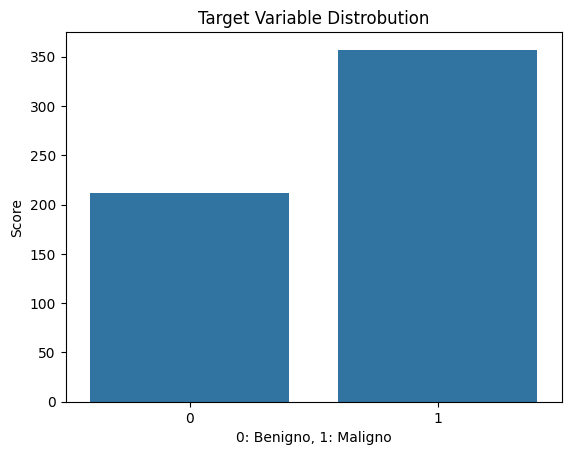

In [9]:
sns.countplot(x='target', data=df)
plt.title('Target Variable Distrobution')
plt.xlabel('0: Benigno, 1: Maligno')
plt.ylabel('Score')
plt.show()

In [10]:

x = data.data
y = data.target
nomes =list(data.feature_names)
classe = list(data.target_names)

In [11]:
clf = DecisionTreeClassifier(max_depth=2)

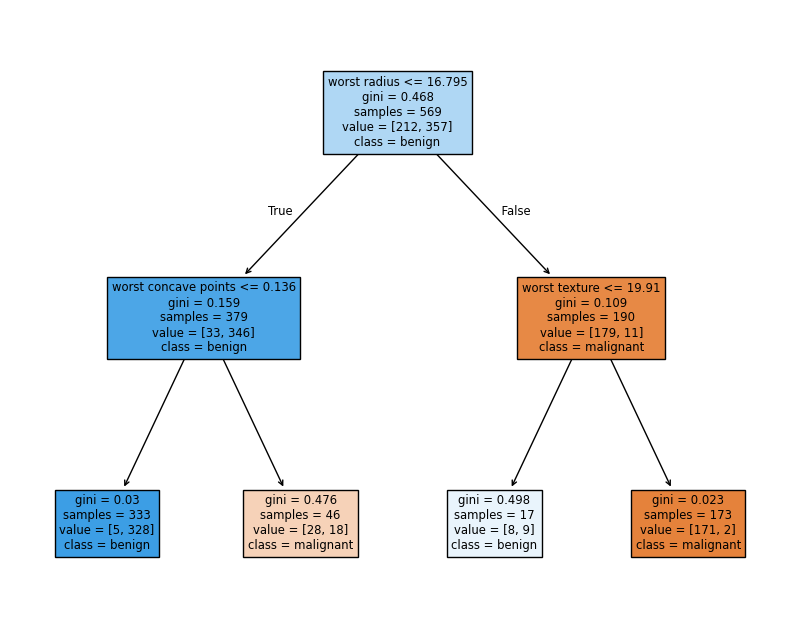

In [12]:
clf.fit(x,y)
plt.figure(figsize=(10,8))
plot_tree(clf, filled=True, feature_names=nomes, class_names=classe)
plt.show()

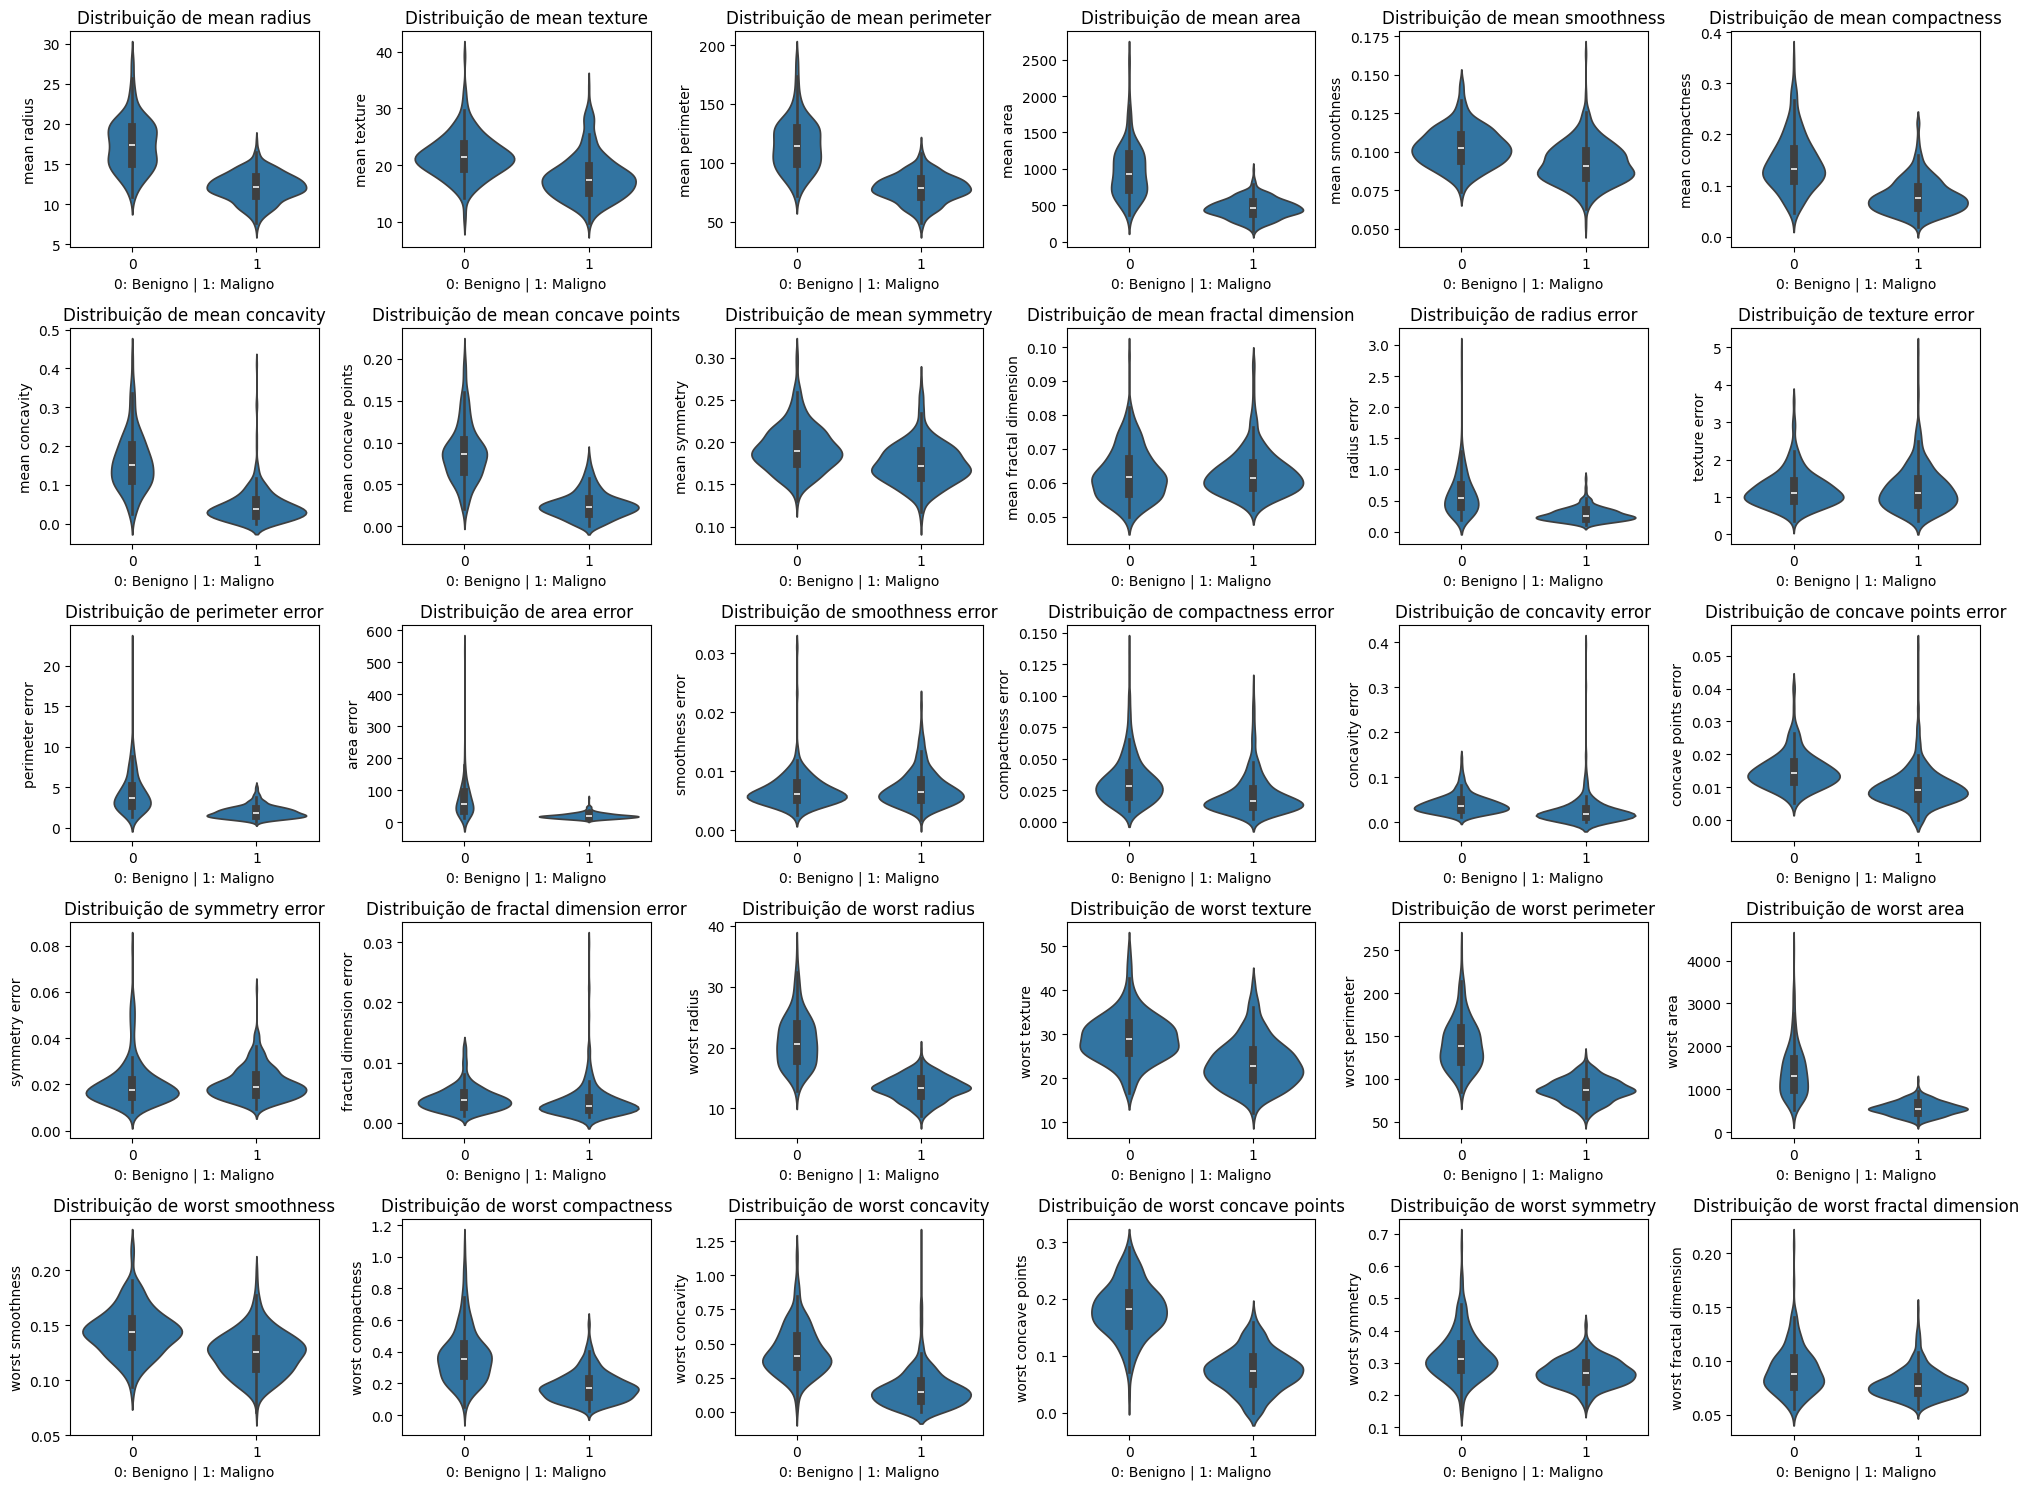

In [13]:
features = df.columns[:-1]
fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
axs = axs.flatten()
for i, feature in enumerate(features):
    sns.violinplot(x='target', y=feature, data=df, split=False, ax=axs[i])
    axs[i].set_title(f'Distribuição de {feature}')
    axs[i].set_xlabel('0: Benigno | 1: Maligno')
    axs[i].set_ylabel(feature)
for i in range(len(features), len(axs)):
    fig.delaxes(axs[i])
plt.tight_layout()
plt.show()


In [14]:

scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [15]:
from sklearn.model_selection import train_test_split
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x,y,test_size=0.25, random_state=0)

In [16]:

from sklearn.svm import SVC
svm = SVC(kernel='linear', C=2)
svm.fit(x_treinamento,y_treinamento)

SVC(C=2, kernel='linear')

In [17]:
previsoes = svm.predict(x_teste)
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_teste,previsoes)

0.958041958041958

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
x_treinamento_pca = pca.fit_transform(x_treinamento)
x_teste_pca = pca.transform(x_teste)
x_treinamento_pca

array([[-2.8380771 , -0.3193802 , -0.50978696],
       [-3.23881077,  0.94669515,  1.4630147 ],
       [ 3.92831902, -3.3009157 ,  1.84183164],
       ...,
       [-3.17962251,  0.43326773,  0.57700503],
       [-5.59141525, -0.75288918,  4.06478207],
       [-1.20802261,  1.32965049,  1.26115052]])

In [20]:
svm_pca = SVC(kernel='linear',C=2)
svm_pca.fit(x_treinamento_pca, y_treinamento)

SVC(C=2, kernel='linear')

In [22]:
previes = svm_pca.predict(x_teste_pca)
accuracy_score(y_teste,previsoes)

0.958041958041958

In [25]:
from sklearn.feature_selection import f_classif, SelectKBest
selecao = SelectKBest(f_classif,k=7)
x_anova=selecao.fit_transform(x,y)

In [28]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x_anova,y,test_size=0.3, random_state=42)

In [29]:
svm_anova= SVC(kernel='linear', C=2)
svm_anova.fit(x_treinamento,y_treinamento)

SVC(C=2, kernel='linear')

In [30]:
previsoes = svm_anova.predict(x_teste)
accuracy_score(y_teste,previsoes)


0.9766081871345029

In [38]:
from sklearn.model_selection import GridSearchCV
parametros = {'C':[1.0,1.5,2.0],
              'kernel':['rbf','linear','poly','sigmoid']}

In [31]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(x,y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf'}
0.9771619313771154


In [39]:
from sklearn.model_selection import cross_val_score, KFold

resultados_svm = []

In [40]:

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True,random_state=i)
    svm = SVC(kernel = 'rbf', C= 1.5)
    scores = cross_val_score(svm,x,y,cv=kfold)
    resultados_svm.append(scores.mean())

In [41]:
resultados_svm

[np.float64(0.9789473684210526),
 np.float64(0.9736215538847116),
 np.float64(0.9753759398496239),
 np.float64(0.9753759398496239),
 np.float64(0.9771303258145363),
 np.float64(0.9735902255639097),
 np.float64(0.9806704260651629),
 np.float64(0.9718671679197994),
 np.float64(0.9718984962406015),
 np.float64(0.975407268170426),
 np.float64(0.9788533834586465),
 np.float64(0.9788847117794484),
 np.float64(0.9771929824561403),
 np.float64(0.9771616541353383),
 np.float64(0.9807017543859649),
 np.float64(0.9771616541353385),
 np.float64(0.9806704260651629),
 np.float64(0.9753759398496239),
 np.float64(0.9770989974937343),
 np.float64(0.9736842105263157),
 np.float64(0.9753759398496239),
 np.float64(0.9754385964912281),
 np.float64(0.975344611528822),
 np.float64(0.9788533834586465),
 np.float64(0.9789473684210526),
 np.float64(0.9771303258145363),
 np.float64(0.9719298245614034),
 np.float64(0.9789160401002507),
 np.float64(0.975344611528822),
 np.float64(0.9771929824561403)]

In [42]:
print(np.mean(resultados_svm))#acuracia media
print(np.std(resultados_svm))#desvio padrao

0.9765048036758563
0.002505044650008366
